## Datastory Telling to Movie Executives

Light Screen Productions is a movie production company that is looking to make the next big blockbuster. They are poisitioned to start screening movie ideas from writers and directors in the near future and wanted to add data analysis to their movie decision process. 

As a data analyst, I looked at a dataset of 74 most profitable movies in Hollywood from 2007 - 2011. 

My goal was to look at past trends in movies and discover insights to help Light Screen Productions make an informed choice on deciding what kind of movie they should make next. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 


import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [29]:
#load dataset
movies = pd.read_csv('HollywoodsMostProfitableStories.csv', index_col = 0)

In [60]:
#lets see how it looks
movies.head()

,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
Film,,,,,,,
27 Dresses,Comedy,Fox,71.0,5.343622,40.0,160.308654,2008
(500) Days of Summer,Comedy,Fox,81.0,8.096000,87.0,60.720000,2009
A Dangerous Method,Drama,Independent,89.0,0.448645,79.0,8.972895,2011
A Serious Man,Drama,Universal,64.0,4.382857,89.0,30.680000,2009
Across the Universe,Romance,Independent,84.0,0.652603,54.0,29.367143,2007


Most columns seem relevant in answeringour business problem. The ones that seem the most interesting are Film, Genre, Lead studio, Profitability, and Worldwide Gross. 

We will also look into movie ratings and does that correlate with high profitabilty/World Wide Gross

<Figure size 1080x720 with 0 Axes>

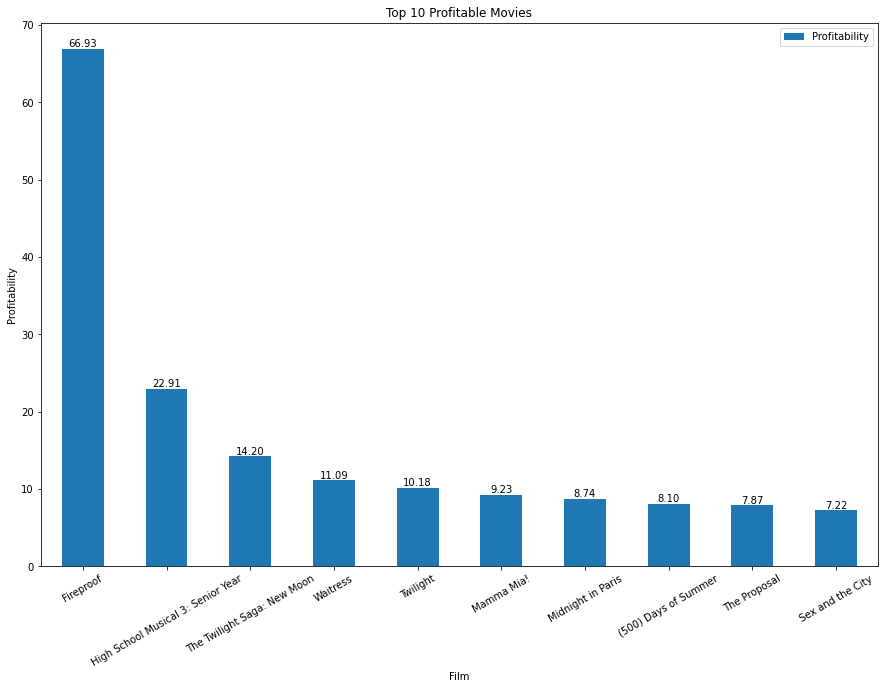

In [52]:
#top 10 movies by Profitability
plt.figure(figsize=(15,10))
ax = movies.sort_values('Profitability', ascending = False)[:10].plot.bar(y = 'Profitability', figsize = (15,10))
plt.xticks(rotation=30)
plt.ylabel('Profitability')
plt.title('Top 10 Profitable Movies')

rects = ax.patches

for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height +.01,
                '%.2f' %float(height),
                ha='center', va='bottom')

plt.show()

In [53]:
#Percentage difference between 2nd and 1st place
percent_change = (movies.loc['Fireproof']['Profitability'] - movies.loc['High School Musical 3: Senior Year']['Profitability'])/movies.loc['High School Musical 3: Senior Year']['Profitability']
print('Percent increase between High School Musical and Fireproof: {:.2f}%'.format(percent_change *100))

Percent increase between High School Musical and Fireproof: 192.12%


Fireproof was the most profitable movie in our data. It's not even close. There is a 192% increase in profitability between High School Musical 3: Senior Year and Fireproof. Let's see if these changes are also reflected in Worldwide Gross.

<Figure size 1080x720 with 0 Axes>

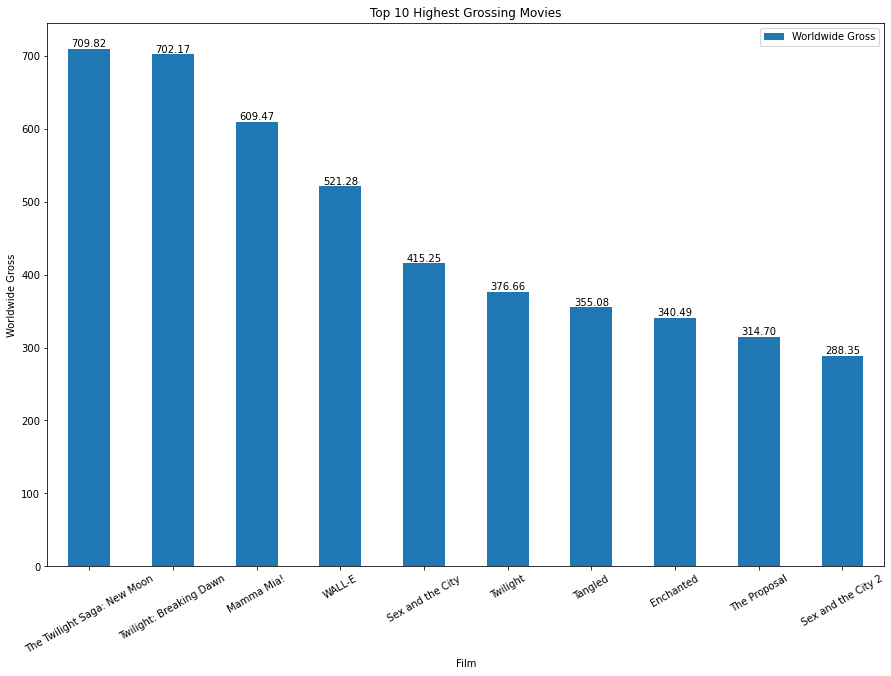

In [56]:
#Visualize top 10 movies by Worldwide Gross
plt.figure(figsize=(15,10))
ax = movies.sort_values('Worldwide Gross', ascending = False)[:10].plot.bar(y = 'Worldwide Gross', figsize = (15,10))
plt.xticks(rotation=30)
plt.ylabel('Worldwide Gross')
plt.title('Top 10 Highest Grossing Movies')
rects = ax.patches

for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height +.01,
                '%.2f' %float(height),
                ha='center', va='bottom')
plt.show()

Fireproof and High School Musical are nowhere to be found on this chart. In fact, the highest grossing movie, is the third highest in profitability.

5 of these movies are present in both graphs. The list includes, Twilight: New Moon, Mamma Mia, Sex and the City, Twilight, and The Proposal

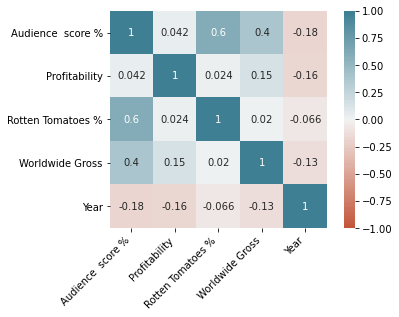

In [65]:
corr = movies.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Using the heatmap we can look at the relationship between Worldwide Gross and Profitability. with a correlation coefficient of 0.15 it doesn't look like there is a strong positive relationship between Worldwide Gross and Profitability.

It may just be a coincidence that many of the same movies show up in both top 10 profitable and top 10 highest grossing graph. 

Other points of interest on this chart is the correlation between Audience Score and Rotton Tomato score, and Worldwide Gross and Audience Score

In [95]:
#Visualize by Genre
genre_count = movies['Genre'].value_counts()

genre_count = pd.DataFrame(genre_count)
genre_count['Percent Represented'] = round((genre_count/74) * 100,2)
genre_count

,Genre,Percent Represented
Comedy,41,55.41
Romance,15,20.27
Drama,13,17.57
Animation,3,4.05
Action,1,1.35
Fantasy,1,1.35


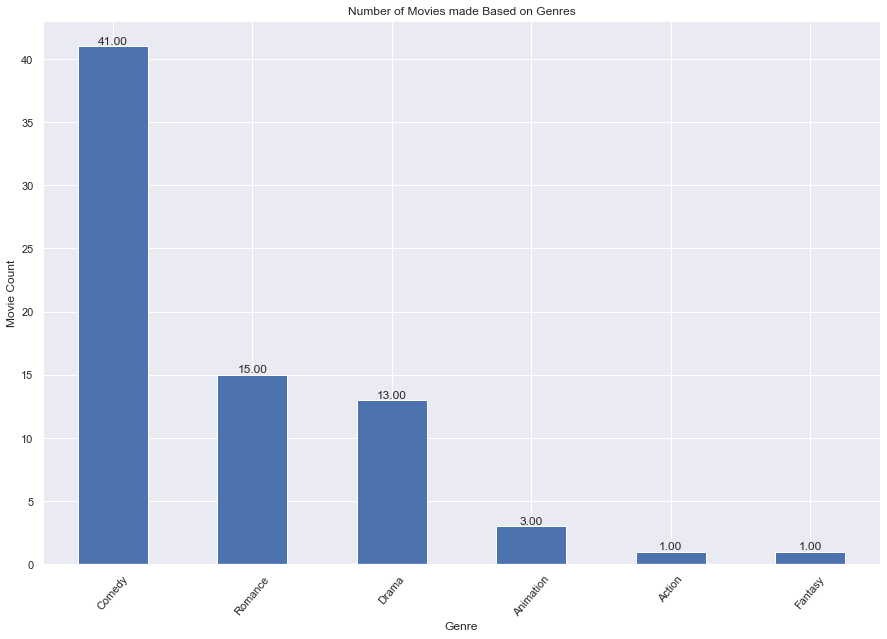

In [156]:
plt.figure(figsize=(15,10))

ax = genre_count['Genre'].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Genre")
plt.title('Number of Movies made Based on Genres')
plt.ylabel("Movie Count")

rects = ax.patches
for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height +.01,
                '%.2f' %float(height),
                ha='center', va='bottom')
plt.show()

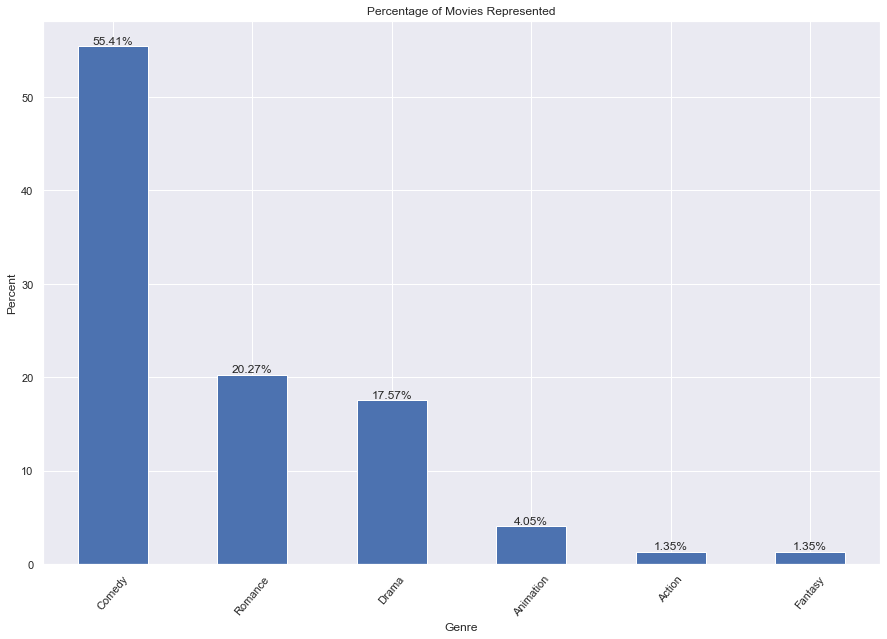

In [157]:
plt.figure(figsize=(15,10))

ax = genre_count['Percent Represented'].plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Genre")
plt.title("Percentage of Movies Represented")
plt.ylabel("Percent")
rects = ax.patches
for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height +.01,
                '%.2f' %float(height) + '%',
                ha='center', va='bottom')
plt.show()

Here is a quick breakdown of the data we have. Movies that fall under the Comedy genre represents 55% of the movies in this dataset, next is Romane with 20%, then Drama with 17%, Animation has 4% and Action and Fantasy has 1%

In [114]:
genre_profit = movies.groupby('Genre').mean()['Profitability'].sort_values(ascending = False)

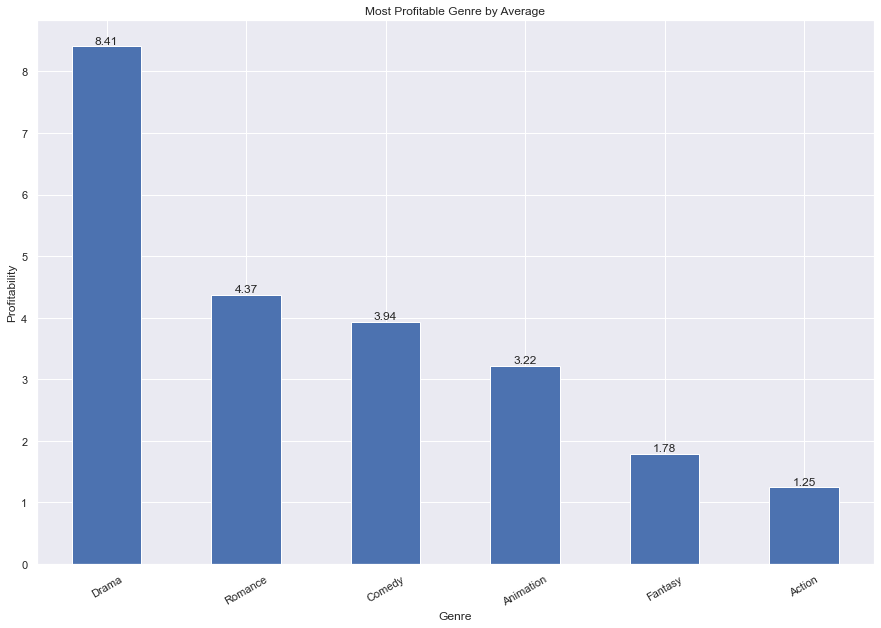

In [121]:
#Visualize Profitability
plt.figure(figsize=(15,10))
ax = movies.groupby('Genre').mean()['Profitability'].sort_values(ascending = False).plot.bar(x = 'Genre',y = 'Profitability', figsize = (15,10))
plt.xticks(rotation=30)
plt.ylabel('Profitability')
plt.title('Most Profitable Genre by Average')
rects = ax.patches
for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height +.01,
                '%.2f' %float(height),
                ha='center', va='bottom')
plt.show()

In [118]:
percent_change = (genre_profit['Drama'] - genre_profit['Romance'])/genre_profit['Romance']
print('Percent increase between Romance and Drama genre: {:.2f}%'.fobrmat(percent_change *100))

Percent increase between Romance and Drama genre: 92.32%


The Drama genre on average has been the most profitable. There is a 192% increase in profitability between Romance and Drama genre. 

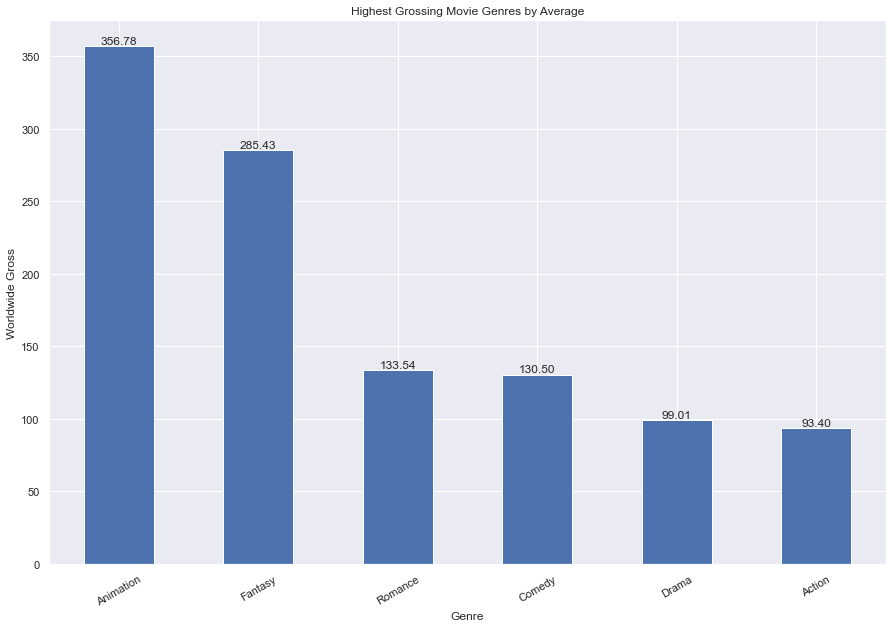

In [120]:
plt.figure(figsize=(15,10))
ax = movies.groupby('Genre').mean()['Worldwide Gross'].sort_values(ascending = False).plot.bar(x = 'Genre',y = 'Worldwide Gross', figsize = (15,10))
plt.xticks(rotation=30)
plt.ylabel('Worldwide Gross')
plt.title('Highest Grossing Movie Genres by Average')

rects = ax.patches
for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height +.01,
                '%.2f' %float(height),
                ha='center', va='bottom')
plt.show()

Drama is the most profitable movie genre with romance and comedy coming in at 2nd and 3rd. On the other hand, Animation is the highest grossing drama, with Fantasy and Romance in 2nd and 3rd.

Animation and Fantasy are on top of the Highest Grossing movies by Genre, and rank towards the bottom on profitability. 

That might suggest that Drama, Romance, and Comedy movies cost little to make and have huge returns on average and Animation and Fantasy movies make alot of money, but also cost alot of money to make. 

Animation and Fantasy movies also have a large worldwide appeal. If our goal at Light Screen Productions is to spread brand awareness while also being profitable we can look at Romance and Comedy movies as they are in the middle of both graphs

posx and posy should be finite values
posx and posy should be finite values


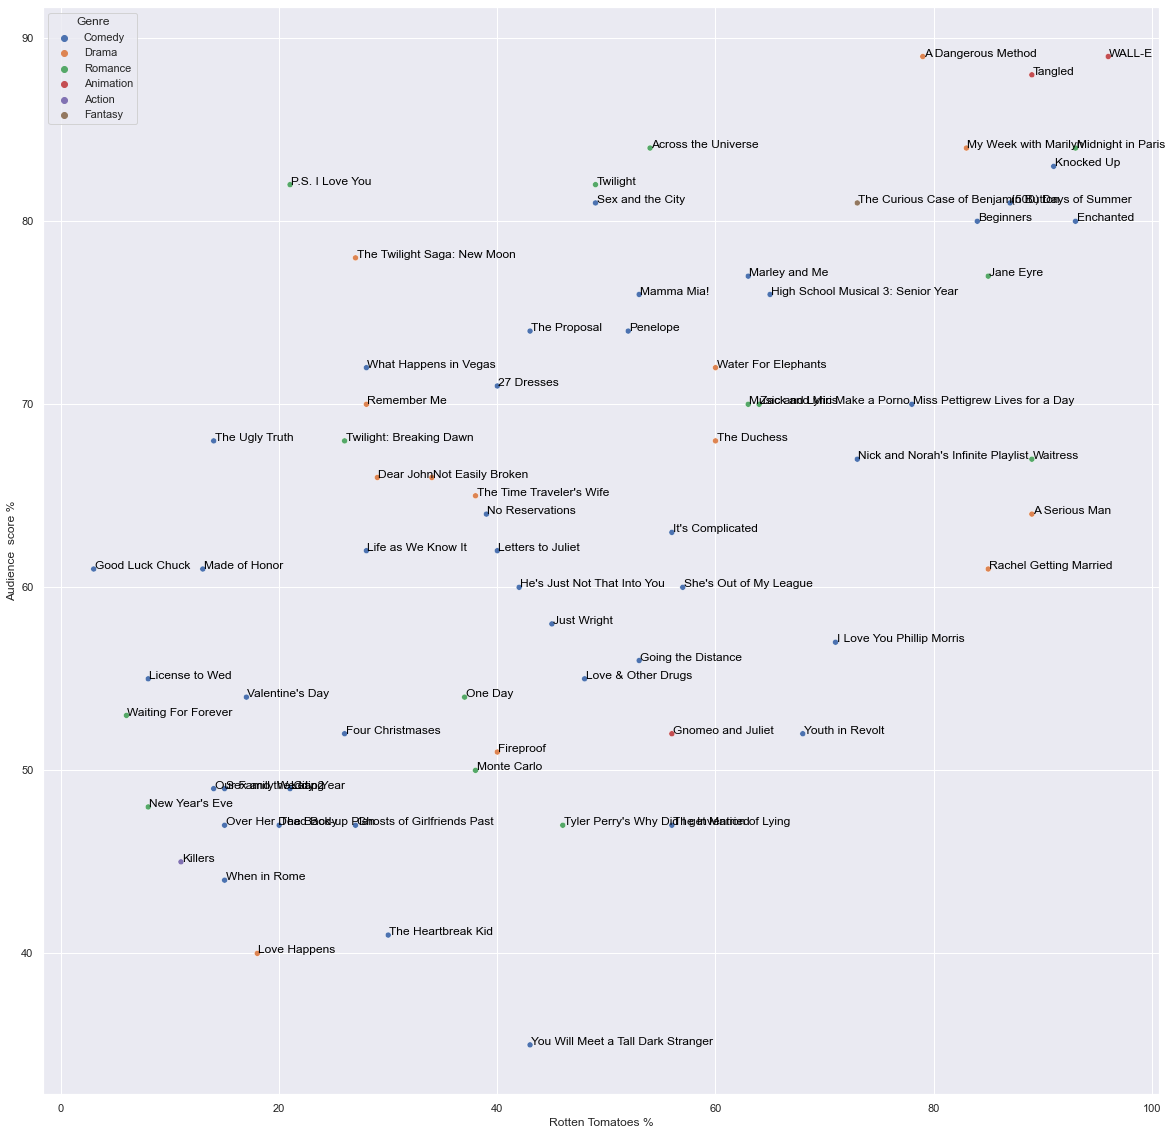

In [152]:
#Lets visualize Rotton Tomatoes % and Audience Score %

sns.set(rc={'figure.figsize':(20,20)})
sns.scatterplot(x =movies['Rotten Tomatoes %'],y = movies['Audience  score %'], ci = None, hue = movies['Genre'])

for line in range(0,movies.shape[0]):
     plt.text(movies['Rotten Tomatoes %'][line]+0.1, movies['Audience  score %'][line], s = movies.index[line], horizontalalignment='left', size='medium', color='black')

plt.show()

Here we see the graph of Audience score vs Rotton Tomato score. We can observe that many of the Movies that rank high in Audience Score are also on the graph of Top 10 Highest Grossing Movies. We have Wall-E, the Twilight Saga, and Mamma Mia 

posx and posy should be finite values
posx and posy should be finite values


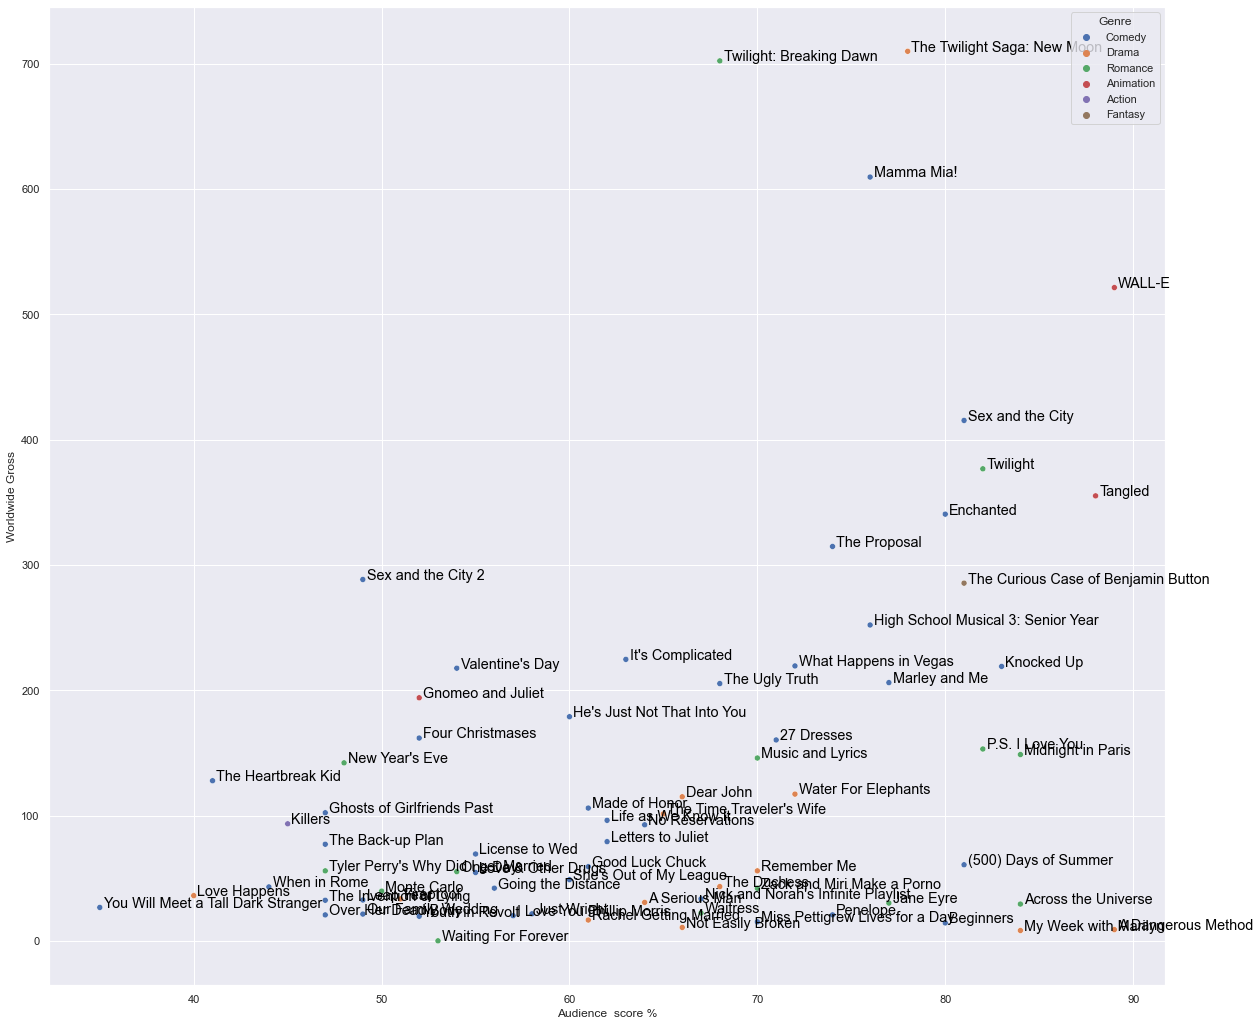

In [153]:
sns.set(rc={'figure.figsize':(20,18)})
sns.scatterplot(x=movies['Audience  score %'], y =movies['Worldwide Gross'], hue = movies['Genre'])

for line in range(0,movies.shape[0]):
     plt.text(movies['Audience  score %'][line]+0.2, movies['Worldwide Gross'][line], s = movies.index[line], horizontalalignment='left', size='large', color='black')

plt.show()

Looks like there is a loose relationship between Worldwide Gross and Audience score %. Although higher rated movies have the potential to make more money, there are plenty of points on the graph where higher rated movies made around the same gross as lower rated movies

C:\Users\kenne\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


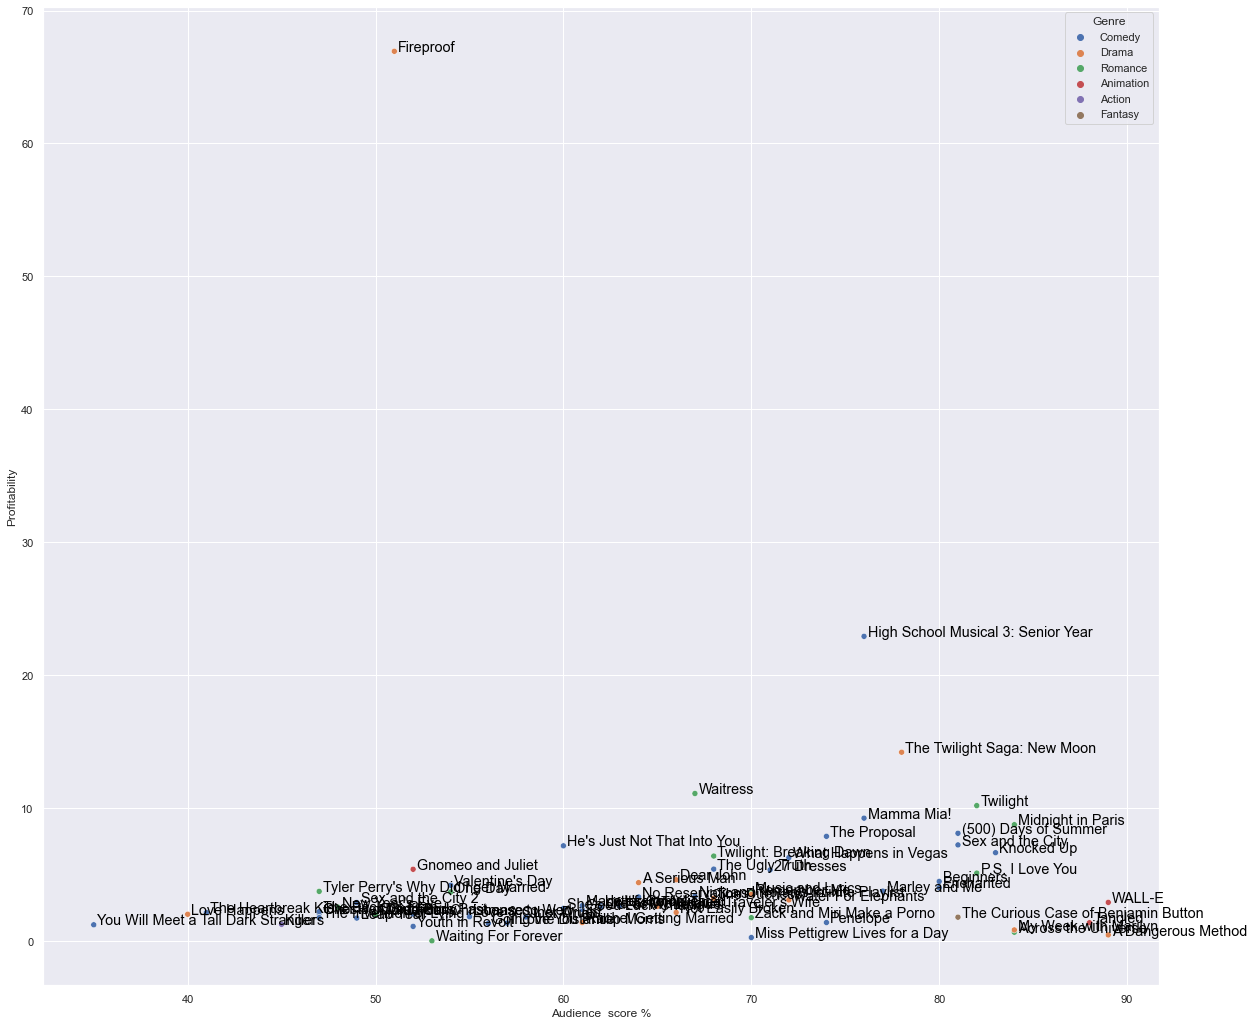

In [154]:
sns.scatterplot(movies['Audience  score %'], movies['Profitability'], hue = movies['Genre'])

for line in range(0,movies.shape[0]):
     plt.text(movies['Audience  score %'][line]+0.2, movies['Profitability'][line], s = movies.index[line], horizontalalignment='left', size='large', color='black')

plt.show()

With profitability vs audience score there is even less of a relationship. Again the same issue is present. Higher rated movies is not guaranteed to generate the most profit, there are some high rated movies that failed at the box office and made as much profit as lower rated movies. 

Fireproof is a huge outlier in our data. For a number of factors, the movie was very profitable, but only 52% of the audience enjoyed it. 

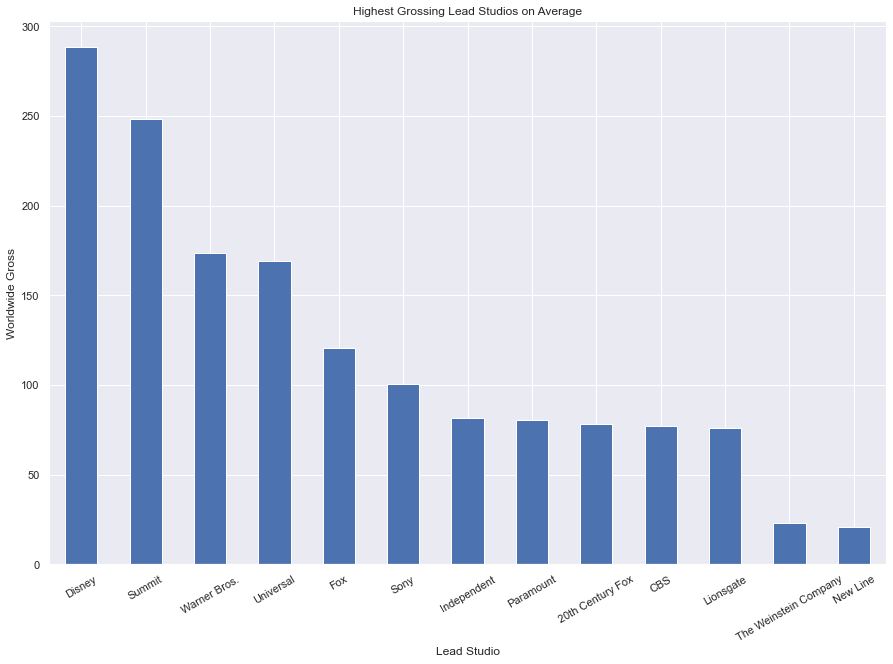

In [155]:
#Last visualization - Lead Studio and Profitability 
movies.groupby('Lead Studio').mean()['Worldwide Gross'].sort_values(ascending = False).plot.bar(x = 'Lead Studio',y = 'Profitability', figsize = (15,10))
plt.xticks(rotation=30)
plt.ylabel('Worldwide Gross')
plt.title('Highest Grossing Lead Studios on Average')
plt.show()

Here we have the Highest Grossing Movie Studios Disney is the highest grossing lead studio, with Summit and Warner Bros in 2nd and 3rd.

I believe that while profitabilty measures how much money a movie has made. Worldwide Gross is a better metric for determining success because it demonstrates how popular a movie was to the domestic and international audience

## Conclusion

If we are trying to figure out how to make the next hit movie we should look at Worldwide Gross as an indicator of movie popularity. We should be cautious in believing that Animation and Fantasy are the highest grossing movie genre as only 1 movie from each genre was represented in our sample. 

Romance and Comedy also scored highly in profitability with the average being 4.37 and 3.9 respectively. These movie genres are cheaper to produce, but have a wide appeal to the general audience. 

Therefore we should look at movie ideas in the Romance and Comedy genre when we talk with our writers. 

